<a href="https://colab.research.google.com/github/SoubhikGhosh/Grade-Prediction/blob/main/Grade_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

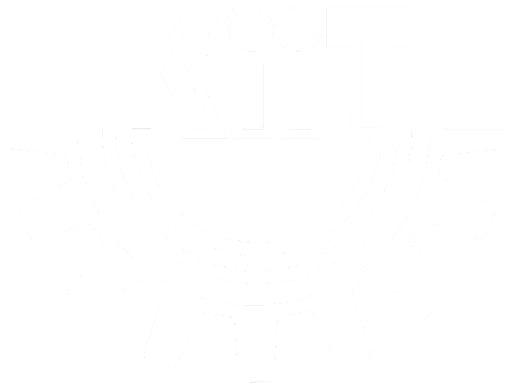

#Student Performance Analysis and Grade Prediction
Developed as a part of 
#####Major Project: _(CS4082) PROJECT-2_ by
*   Ashmita De	1805474
*   Nitin Sultania	1805500
*   Niyati Sinha	1805501
*   Soubhik Ghosh	1805709



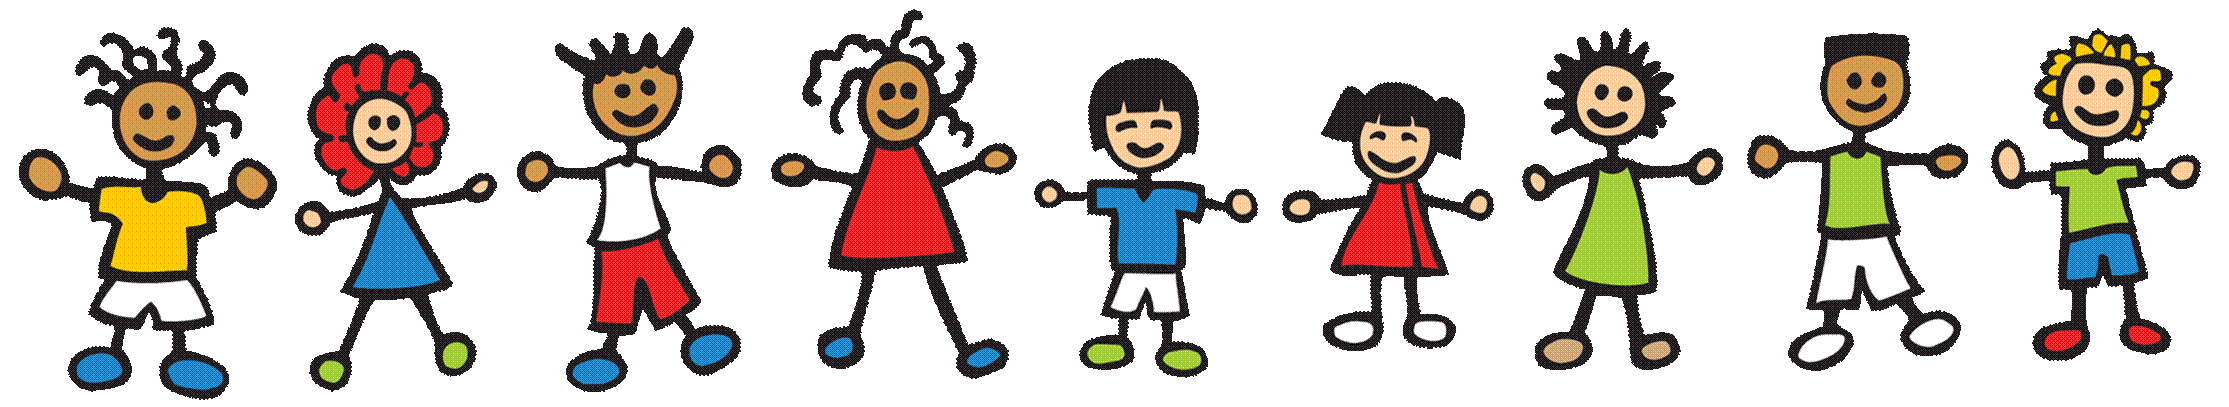

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Table of Content
1. Import Packages
2. Load Dataset
3. Data Preparation
4. EDA
     - 4.1 Final Grade Distribution
     - 4.2 Correlation Heatmap
     - 4.3 Romantic Status
     - 4.4 Alcohol Consumption
     - 4.5 Parents Education Level
     - 4.6 Frequency Of Going Out
     - 4.7 Desire Of Higher Education
     - 4.8 Urban Vs. Rural Students
5. Classification
     - 5.1 Prepare Dataset For Modelling
     - 5.2 Decision Tree Classifier
     - 5.3 Random Forest Classifier
     - 5.4 Support Vector Classifier
     - 5.5 Logistic Regression Classifier
     - 5.6 Ada Boost Classifier
     - 5.7 Sochastic Gradient Descent Classifier
     - 5.8 Model Selection
6. Summary

The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Data structures and Algorithms (dsa) and Object Oriented Programming (oop). [originally (mat) and (por)]

We have classified these students into three categories, "good", "fair", and "poor", according to their final exam performance. Then we analyzed a few features that have significant influence on students' final performance, including Romantic Status, Alcohol Consumption, Parents Education Level, Frequency Of Going Out, Desire Of Higher Education and Living Area. Finally, leveraging avaiable features, we have created various machine learning models to predict students' final performance classification and have compared models performance based on one-out sample accuracy score.

Dataset that we used is available at: http://archive.ics.uci.edu/ml/datasets/Student+Performance#

##Import Packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

##Load Dataset

In [ ]:
# load datasets for two subjects, Math and Portuguese
dsa = pd.read_csv("/content/drive/MyDrive/Final_Project/Marks_Analysis/student_dsa.csv", sep=';')
oop = pd.read_csv("/content/drive/MyDrive/Final_Project/Marks_Analysis/student_oop.csv", sep=';')

##Data Dictionary 

Attributes for both student_dsa.csv (DSA course) and student_oop.csv (OOP course) datasets:
1. school - student's school (binary: "GP" - Guru Govind Singh Public or "MS" - Mordern School)
2. sex - student's sex (binary: "F" - female or "M" - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: "U" - urban or "R" - rural)
5. famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. guardian - student's guardian (nominal: "mother", "father" or "other")
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (DSA or OOP) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, DSA or OOP:
31. G1 - midsem grade (numeric: from 0 to 20)
32. G2 - internal grade (numeric: from 0 to 20)
33. G3 - endsem grade (numeric: from 0 to 20, output target)


##Data Preparation

In [ ]:
# merge datasets
df = pd.concat([dsa,oop])

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
# rename column labels
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','midsem_score','internal_score','endsem_score']

In [ ]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.endsem_score >= 15) & (df.endsem_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.endsem_score >= 10) & (df.endsem_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.endsem_score >= 0) & (df.endsem_score <= 9), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,midsem_score,internal_score,endsem_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


In [ ]:
df.isnull().any()

school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alcohol_usage    False
health                   False
absences                 False
midsem_score             False
internal_score           False
endsem_s

None of the columns are empty

#Exploratory Data Analysis

##Final Grade Distribution

Text(0, 0.5, 'Number of Students')

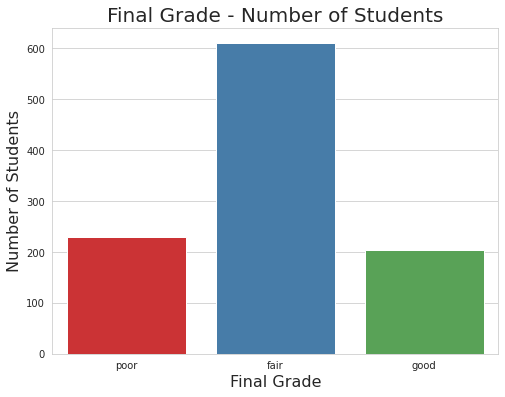

In [ ]:
# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(df.final_grade, order=["poor","fair","good"], palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Students', fontsize=16)

Following the general bell-curve

##Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

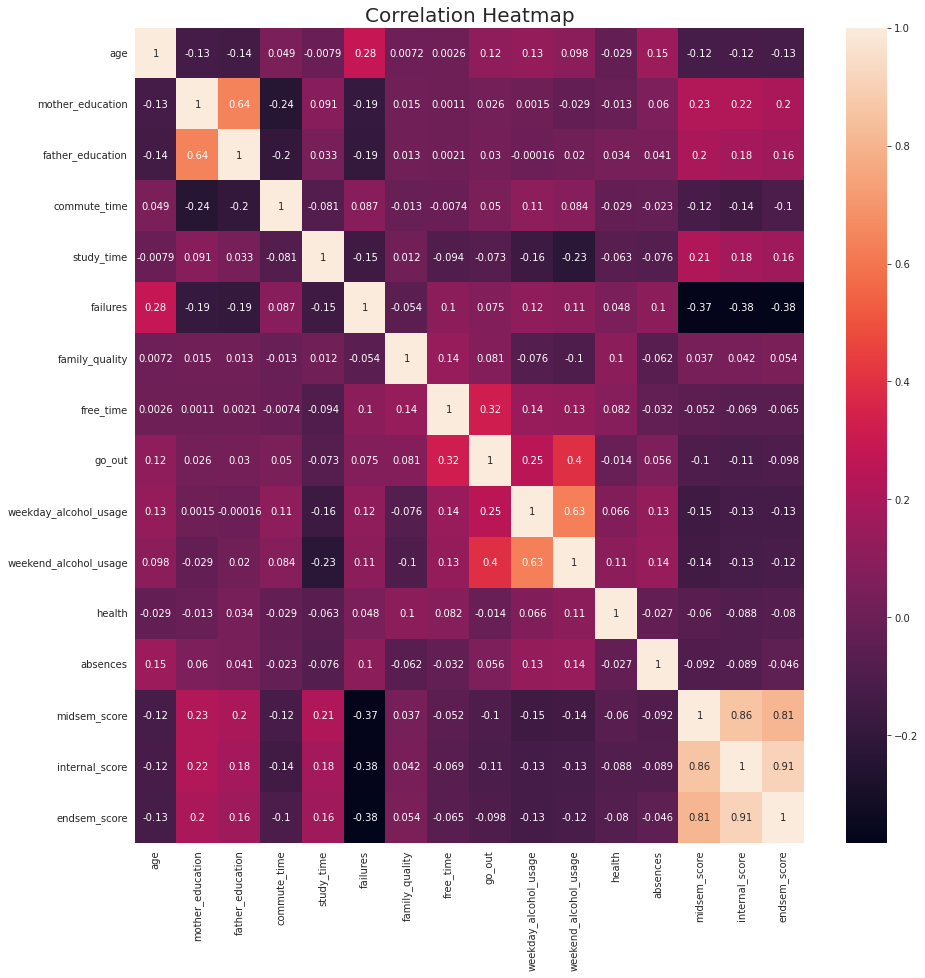

In [ ]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap', fontsize=20)

The target attribute endsem_score has a strong correlation with attributes midsem_score and internal_score. This occurs because endsem_score is the final year grade, while midsem_score and internal_score correspond to the 1st and 2nd period grades. It is more difficult to predict ensem_score without midsem_score and internal_score, as it shows a behaviourial pattern by student, but such prediction is much more useful.

##Final Grade By Romantic Status
Let us see how students in a romantic relationship vs. those not in a relationship perform 

In [ ]:
# romantic status
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
romance_tab1 = pd.crosstab(index=df.final_grade, columns=df.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)

In [ ]:
plt.figure()
romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

Null Hypothesis: Students who aren't in a romantic relationship mostly perform better than students who are.

In [ ]:
# A p-value less than 0.05 (typically ≤ 0.05) is statistically significant
import statsmodels.api as sm
romance_table = sm.stats.Table(romance_tab1)
romance_rslt = romance_table.test_nominal_association()
romance_rslt.pvalue

Hyphothesis Testing confirmed, romantic status has a significant correlation with final grade.

## Final Grade By Alcohol Consumption
Let us see how alcohol consumption influences students' final grade

In [ ]:
# weekend alcohol consumption
alc_tab1 = pd.crosstab(index=df.final_grade, columns=df.weekend_alcohol_usage)
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)

Text(0.5, 0, 'Final Grade')

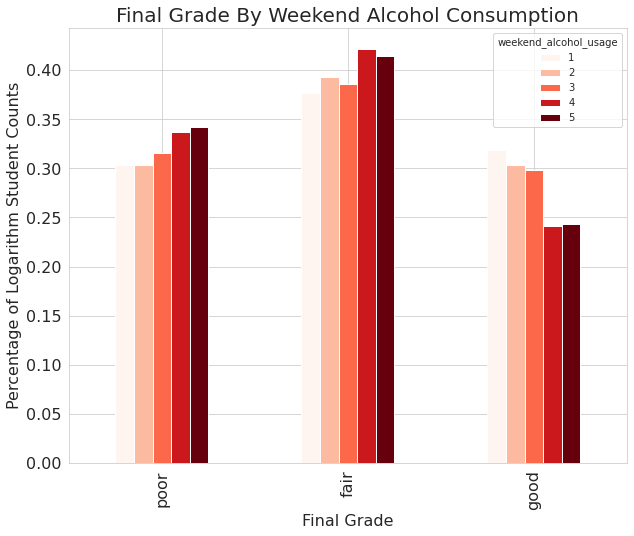

In [ ]:
# create good student dataframe
good = df.loc[df.final_grade == 'good']
good['good_alcohol_usage']=good.weekend_alcohol_usage
# create poor student dataframe
poor = df.loc[df.final_grade == 'poor']
poor['poor_alcohol_usage']=poor.weekend_alcohol_usage

alc_perc.plot.bar(colormap="Reds", figsize=(10,8), fontsize=16)
plt.title('Final Grade By Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

Null Hypothesis: Students who do not consume alcohol are more likely to perform better.

In [ ]:
# A p-value less than 0.05 (typically ≤ 0.05) is statistically significant
alc_table = sm.stats.Table(alc_tab1)
alc_rslt = alc_table.test_nominal_association()
alc_rslt.pvalue

0.007592294056368298

Hyphothesis Testing confirmed, weekend alcohol consumption has a significant correlation with final grade.

##Final Grade By Parents Education Level
Let us see how parents' education level influence student performance

In [ ]:
good['good_student_father_education'] = good.father_education
poor['poor_student_father_education'] = poor.father_education
good['good_student_mother_education'] = good.mother_education
poor['poor_student_mother_education'] = poor.mother_education
good=good.reset_index(drop=True)
poor=poor.reset_index(drop=True)

Text(0.5, 0, 'Father Education Level')

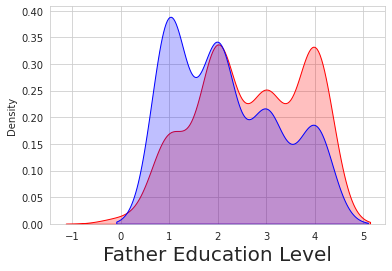

In [ ]:
# see the difference between good and poor performers' father education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,4))
p2=sns.kdeplot(good['good_student_father_education'], shade=True, color="r")
p2=sns.kdeplot(poor['poor_student_father_education'], shade=True, color="b")
plt.xlabel('Father Education Level', fontsize=20)

Text(0.5, 0, 'Mother Education Level')

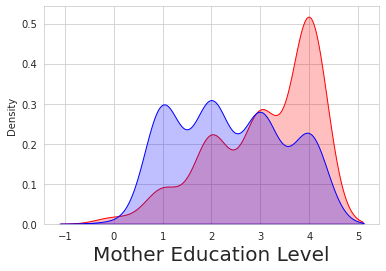

In [ ]:
# see the difference between good and poor performers' mother education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,4))
p3=sns.kdeplot(good['good_student_mother_education'], shade=True, color="r")
p3=sns.kdeplot(poor['poor_student_mother_education'], shade=True, color="b")
plt.xlabel('Mother Education Level', fontsize=20)

Parents' education level has a positive correlation with students' final score. Comparatively, mother's education level has bigger influence than father's education level!

##Final Grade By Frequency Of Going Out
Let us see how frequency of going out with friends influences students' final performance

Text(0.5, 0, 'Frequency of Going Out')

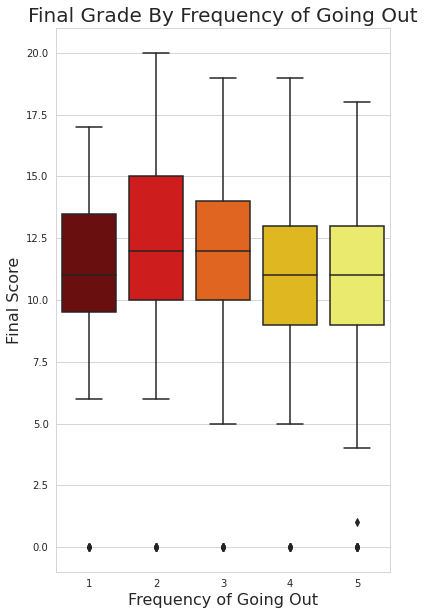

In [ ]:
# going out with friends (numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,10))
sns.boxplot(x='go_out', y='endsem_score', data=df, palette='hot')
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Frequency of Going Out', fontsize=16)

Text(0.5, 0, 'Final Grade')

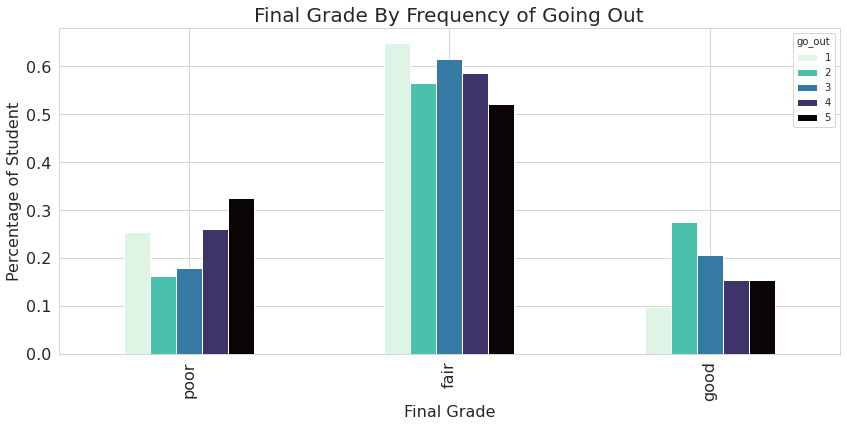

In [ ]:
out_tab = pd.crosstab(index=df.final_grade, columns=df.go_out)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

Null Hypothesis: Limiting going out may increase grades

In [ ]:
# A p-value less than 0.05 (typically ≤ 0.05) is statistically significant
out_table = sm.stats.Table(out_tab)
out_rslt = out_table.test_nominal_association()
out_rslt.pvalue

4.365198328282194e-05

Hyphothesis Testing confirmed, the frequency of going out with friends has a significant correlation with students' final performance.

##Final Grade By Desire To Go To College
Let us see how desire to go to college influence student final performance

Text(0.5, 0, 'Age')

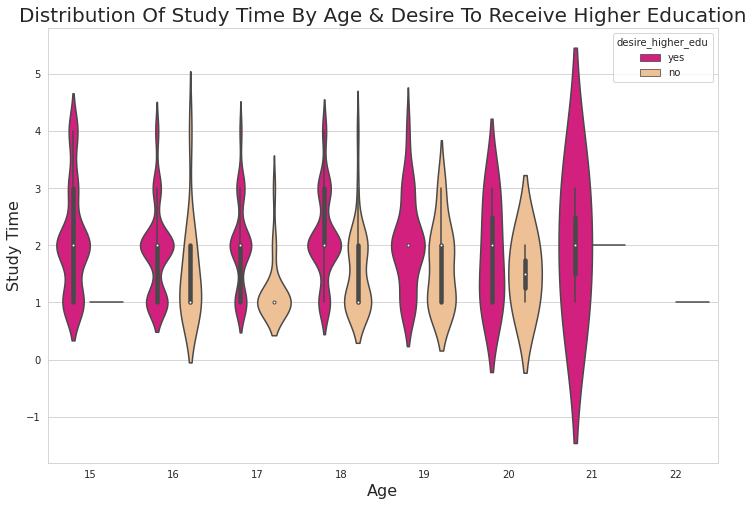

In [ ]:
# Desire for higher education and study time by age 
plt.figure(figsize=(12,8))
sns.violinplot(x='age', y='study_time', hue='desire_higher_edu', data=df, palette="Accent_r", ylim=(1,6))
plt.title('Distribution Of Study Time By Age & Desire To Receive Higher Education', fontsize=20)
plt.ylabel('Study Time', fontsize=16)
plt.xlabel('Age', fontsize=16)

In [ ]:
higher_tab = pd.crosstab(index=df.final_grade, columns=df.desire_higher_edu)
higher_perc = higher_tab.apply(perc).reindex(index)

Text(0, 0.5, 'Percentage of Student')

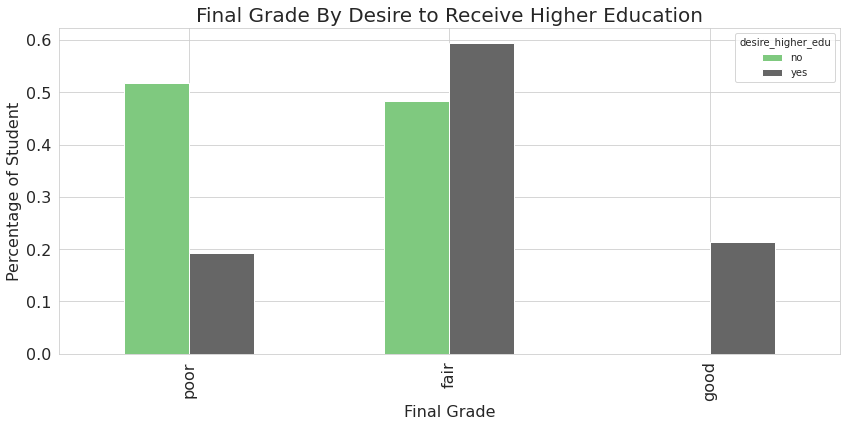

In [ ]:
higher_perc.plot.bar(colormap="Accent", figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

Null Hypothesis: Students with good grades are more likely to pursue future studies.

In [ ]:
# chi-square test result -- significant!
import statsmodels.api as sm
higher_table = sm.stats.Table(higher_tab)
higher_rslt = higher_table.test_nominal_association()
higher_rslt.pvalue

2.2470914018413168e-13

Hyphothesis Testing confirmed, the desire of going to college has a significant correlation with students' final performance.

##Final Grade By Living Area
let us see how the final performance difference between students living in the city and those living in rural areas

In [ ]:
# living area: urban vs. rural
df.address = df.address.map({'U':'Urban', 'R':'Rural'})

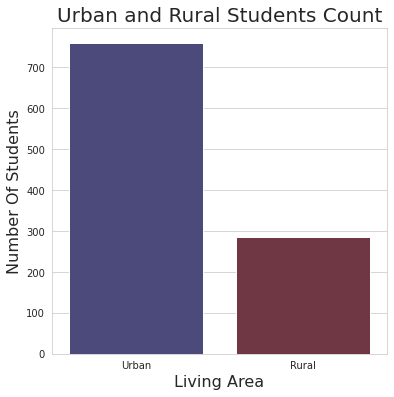

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df.address, palette='icefire')
plt.title('Urban and Rural Students Count', fontsize=20)
plt.xlabel('Living Area', fontsize=16)
plt.ylabel('Number Of Students', fontsize=16)
plt.show()

In [ ]:
ad_tab1 = pd.crosstab(index=df.final_grade, columns=df.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)

Text(0.5, 0, 'Final Grade')

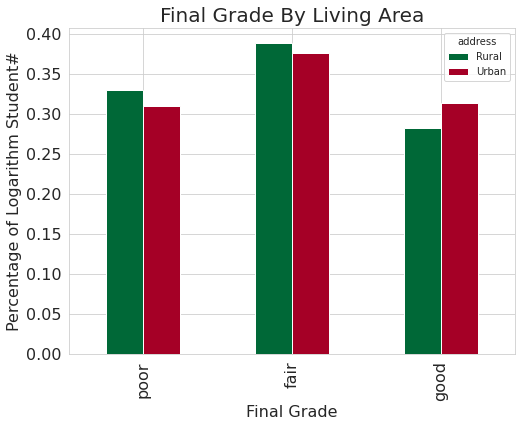

In [ ]:
ad_perc.plot.bar(colormap="RdYlGn_r", fontsize=16, figsize=(8,6))
plt.title('Final Grade By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

Null Hythothesis: Students living in Urban Areas have more probability to score more.

In [ ]:
# chi-square test result -- significant!
ad_table = sm.stats.Table(ad_tab1)
ad_rslt = ad_table.test_nominal_association()
ad_rslt.pvalue

0.007608910517873602

Hypothesis confirmed, students iving in Urban Areas have more probability to score more.

More EDA can be done based on number of absences, health, parents' profession, choice of reason of attending the school etc.

#Classification
### Use Students' Information To Predict Their Final Grade

###Prepare Dataset for Modelling

In [ ]:
# create dataframe dfd for classification
dfd = df.copy()
dfd = dfd.drop([ 'endsem_score'], axis=1)

In [ ]:
# label encode final_grade
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfd.final_grade = le.fit_transform(dfd.final_grade)

In [ ]:
# dataset train_test_split
from sklearn.model_selection import train_test_split
X = dfd.drop('final_grade',axis=1)
y = dfd.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
# see total number of features
len(list(X_train))

314

In [ ]:
# see total number of features
len(list(y_train))

730

In [ ]:
# see total number of features
len(list(X_test))

58

In [ ]:
# see total number of features
len(list(y_test))

314

###Decision Tree Classification

In [ ]:
# find the optimal # of minimum samples leaf
from sklearn.tree import DecisionTreeClassifier

msl=[]
for i in range(1,58):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
max_msl = msl.where(msl==msl.max()).dropna()
print(max_msl)
index_max_msl = max_msl.index[0] # Get index you need
print(index_max_msl)

12    0.869427
dtype: float64
12


In [ ]:
# final model
print('Index max msl: ',index_max_msl)
tree = DecisionTreeClassifier(min_samples_leaf=index_max_msl)
t= tree.fit(X_train, y_train)
print("Decision Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))

dtc_score = np.zeros(2)
dtc_score[0] = t.score(X_train, y_train)
dtc_score[1] = t.score(X_test, y_test)

Index max msl:  12
Decisioin Tree Model Score : 0.910958904109589 , Cross Validation Score : 0.8598726114649682


array([0.9109589 , 0.85987261])

###Random Forest Classification

In [ ]:
# find a good # of estimators
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier()
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
max_ne = ne.where(ne==ne.max()).dropna()
index_max_ne_1 = max_ne.index[0]
print(index_max_ne_1)

48


In [ ]:
# find a good # of min_samples_leaf
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier(n_estimators=index_max_ne_1, min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
max_ne = ne.where(ne==ne.max()).dropna()
index_max_ne_2 = max_ne.index[0]
print(max_ne)
print(index_max_ne_2)

1    0.875796
dtype: float64
1


In [ ]:
# final model
print('Index max ne: ',index_max_ne_1,index_max_ne_2)
forest = RandomForestClassifier(n_estimators=index_max_ne_1, min_samples_leaf=index_max_ne_2)
f = forest.fit(X_train, y_train)
print("Random Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(X_test, y_test))

rfc_score = np.zeros(2)
rfc_score[0] = (f.score(X_train, y_train))
rfc_score[1] = (f.score(X_test, y_test))

Index max ne:  48 1
Random Forest Model Score : 1.0 , Cross Validation Score : 0.8535031847133758


###Support Vector Classification

In [ ]:
from sklearn.svm import SVC
svc = SVC()
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))

svc_score = np.zeros(2)
svc_score[0] = (s.score(X_train, y_train))
svc_score[1] = (s.score(X_test,y_test))


SVC Model Score : 0.8821917808219178 , Cross Validation Score : 0.8821656050955414


###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

In [ ]:
# find optimal # of features to use in the model
from sklearn.feature_selection import SelectKBest, chi2

ks=[]
for i in range(1,58):
    sk = SelectKBest(chi2, k=i)
    x_new = sk.fit_transform(X_train,y_train)
    x_new_test=sk.fit_transform(X_test,y_test)
    l = lr.fit(x_new, y_train)
    ll = l.score(x_new_test, y_test)
    ks.append(ll)  
    
ks = pd.Series(ks)
ks = ks.reindex(list(range(1,58)))

max_ks = ks.where(ks==ks.max()).dropna()
index_max_ks = max_ks.index[0]
print(max_ks)
print(index_max_ks)

3     0.901274
6     0.901274
14    0.901274
dtype: float64
3


Text(0, 0.5, 'Prediction Accuracy')

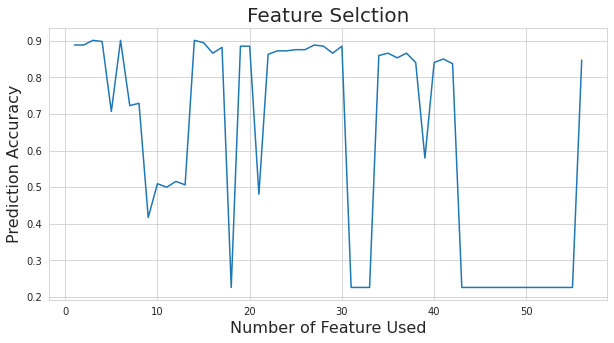

In [ ]:
plt.figure(figsize=(10,5))
ks.plot.line()
plt.title('Feature Selction', fontsize=20)
plt.xlabel('Number of Feature Used', fontsize=16)
plt.ylabel('Prediction Accuracy', fontsize=16)

In [ ]:
# final model
print('Index max ks: ', index_max_ks)
sk = SelectKBest(chi2, k=index_max_ks)
x_new = sk.fit_transform(X_train,y_train)
x_new_test=sk.fit_transform(X_test,y_test)
lr = lr.fit(x_new, y_train)
print("Logistic Regression Model Score" , ":" , lr.score(x_new, y_train) , "," ,
      "Cross Validation Score" ,":" , lr.score(x_new_test, y_test))


lrc_score = np.zeros(2)
lrc_score[0] = (lr.score(x_new, y_train))
lrc_score[1] = (lr.score(x_new_test, y_test))


Index max ks:  3
Logistic Regression Model Score : 0.8904109589041096 , Cross Validation Score : 0.8885350318471338


###Ada Boost Classification

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=2)
af = ada.fit(X_train, y_train)
print("Ada Boost Model Score" , ":" , af.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , af.score(X_test, y_test))


abc_score = np.zeros(2)
abc_score[0] = (af.score(X_train, y_train))
abc_score[1] = (af.score(X_test, y_test))

Ada Boost Model Score : 0.8671232876712329 , Cross Validation Score : 0.8407643312101911


###Stochastic Gradient Descent Classification

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sf = sgd.fit(X_train, y_train)
print("Stochastic Gradient Descent Model Score" , ":" , sf.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , sf.score(X_test, y_test))


sgc_score = np.zeros(2)
sgc_score[0] = (sf.score(X_train, y_train))
sgc_score[1] = (sf.score(X_test, y_test))

Stochastic Gradient Descent Model Score : 0.8287671232876712 , Cross Validation Score : 0.8439490445859873


###Model Selection
Let's compare the performance of each model!

In [ ]:
msm = np.array([dtc_score,rfc_score,svc_score,lrc_score,abc_score,sgc_score])
msm = pd.DataFrame(msm,columns = ['model_score','validation_score'])
model = np.array(['Decision tree','Random forest','Support vector','Logistic regression','Ada boost','Stochastic gradient descent'])
model = pd.DataFrame(model,columns = ['classification'])
msm = pd.DataFrame([model.classification,msm.model_score,msm.validation_score])
msm = msm.T
msm


,classification,model_score,validation_score
0,Decision tree,0.910959,0.859873
1,Random forest,1.0,0.853503
2,Support vector,0.882192,0.882166
3,Logistic regression,0.890411,0.888535
4,Ada boost,0.867123,0.840764
5,Stochastic gradient descent,0.828767,0.843949


In [ ]:
print('We choose this model: ')
max_msm = msm.where(msm.validation_score == msm.validation_score.max()).dropna()
max_msm

We choose this model: 


,classification,model_score,validation_score
3,Logistic regression,0.890411,0.888535


##Conclusion 
The Logistic Regeression model is clearly the best option to go for.


---



---


#Summary
The valedictorian of the class is likely to have this profile:

* Is not in a romantic relationship
* Does not consume alcohol
* Living in urban area
* Does not go out with friends frequently
* Have strong desire of receiving higher education
* Parents both received higher education


